<a href="https://colab.research.google.com/github/Praneeth-18/Clustering_K-Means/blob/main/Clustering_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset

import pandas as pd
path = "/content/drive/MyDrive/ML-Spring-2024/team-Pi/Data/uber_pre_clustering.csv"
df = pd.read_csv(path)

In [ ]:
# Display the first few rows of the dataset to understand its structure
print(df.head())

# Display information about the dataset
print(df.describe())
print(df.info())

   fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          7.5        -73.999817        40.738354         -73.999512   
1          7.7        -73.994355        40.728225         -73.994710   
2         12.9        -74.005043        40.740770         -73.962565   
3          5.3        -73.976124        40.790844         -73.965316   
4         16.0        -73.925023        40.744085         -73.973082   

   dropoff_latitude  passenger_count  euclidean_distance        date  \
0         40.723217              1.0            0.015140  2015-05-07   
1         40.750325              1.0            0.022103  2009-07-17   
2         40.772647              1.0            0.053109  2009-08-24   
3         40.803349              3.0            0.016528  2009-06-26   
4         40.761247              5.0            0.051031  2014-08-28   

       time  day_of_week  
0  19:52:06            3  
1  20:04:56            4  
2  21:45:00            0  
3  08:22:21            4  

In [ ]:
# Performing EDA(Exploratory Data Analysis)

# Check for missing values
print(df.isnull().sum())

# Summary statistics for numerical columns to help identify outliers
print(df.describe())

fare_amount           0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
euclidean_distance    0
date                  0
time                  0
day_of_week           0
dtype: int64
        fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  26243.000000      26243.000000     26243.000000       26243.000000   
mean      11.365907        -73.975169        40.750904         -73.974140   
std        9.823879          0.040603         0.030071           0.040127   
min        0.000000        -75.426904        40.190564         -75.350437   
25%        6.000000        -73.992279        40.736434         -73.991684   
50%        8.500000        -73.982120        40.753155         -73.980618   
75%       12.900000        -73.968466        40.767471         -73.965103   
max      206.380000        -73.137393        41.366138         -73.101445   

       dropoff_latitude  passenger_count  euclidean_d

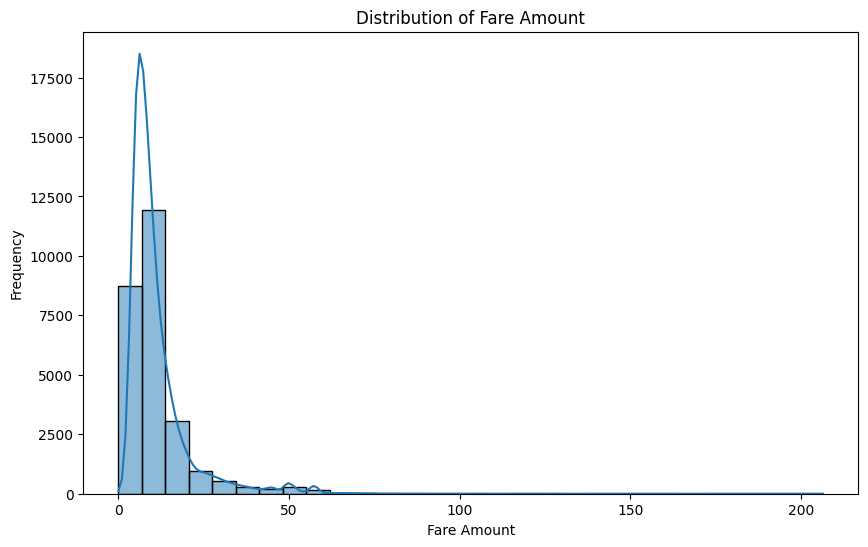

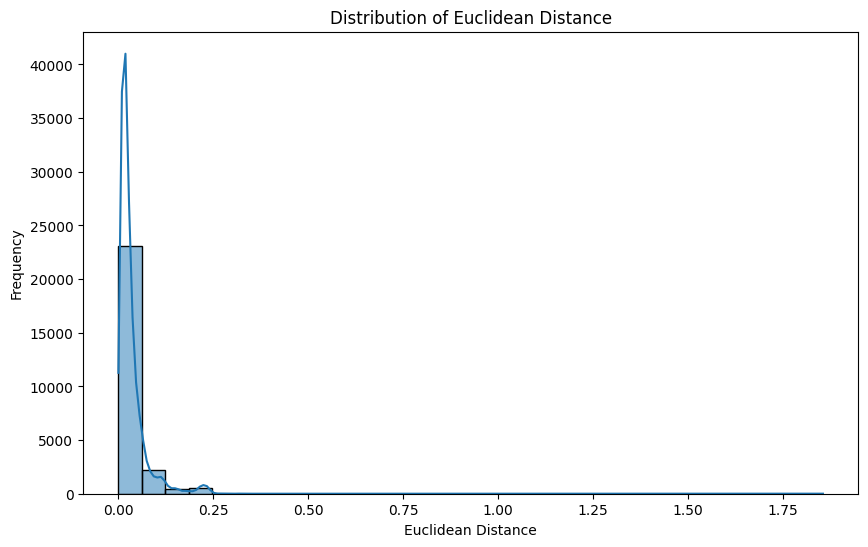

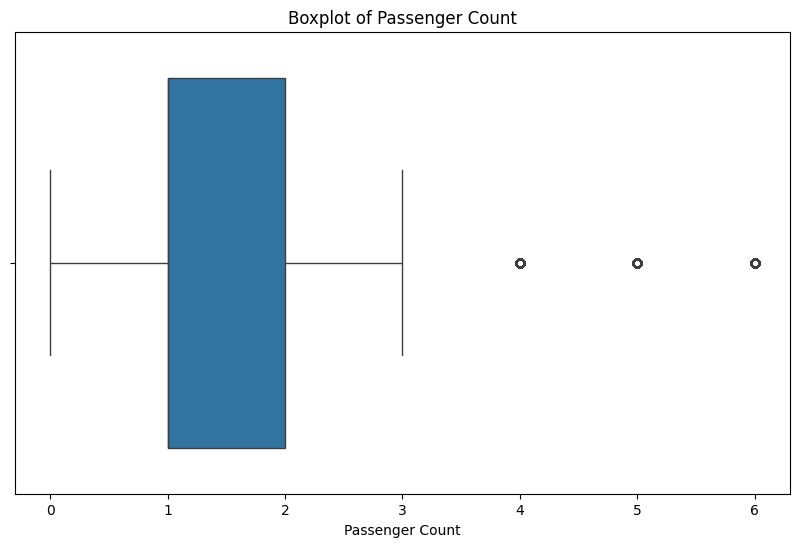

In [ ]:
# We will plot some visualizations to better understand the distribution of key features
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of fare amount
plt.figure(figsize=(10, 6))
sns.histplot(df['fare_amount'], bins=30, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

# Distribution of euclidean distance
plt.figure(figsize=(10, 6))
sns.histplot(df['euclidean_distance'], bins=30, kde=True)
plt.title('Distribution of Euclidean Distance')
plt.xlabel('Euclidean Distance')
plt.ylabel('Frequency')
plt.show()

# Boxplot for passenger count
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['passenger_count'])
plt.title('Boxplot of Passenger Count')
plt.xlabel('Passenger Count')
plt.show()

# **Cleaning the dataset**

In [ ]:
# Remove rides with $0 fare amount
df_cleaned = df[df['fare_amount'] > 0]

# Cap fare_amount and euclidean_distance at the 99th percentile
fare_upper_limit = df_cleaned['fare_amount'].quantile(0.99)
distance_upper_limit = df_cleaned['euclidean_distance'].quantile(0.99)

df_cleaned['fare_amount'] = df_cleaned['fare_amount'].clip(upper=fare_upper_limit)
df_cleaned['euclidean_distance'] = df_cleaned['euclidean_distance'].clip(upper=distance_upper_limit)

# Remove rides with 0 passengers
df_cleaned = df_cleaned[df_cleaned['passenger_count'] > 0]

# Check the cleaned dataset's summary statistics again
summary_statistics_cleaned = df_cleaned.describe()

# Display the cleaned summary statistics
summary_statistics_cleaned

<ipython-input-15-477f3123de41>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['fare_amount'] = df_cleaned['fare_amount'].clip(upper=fare_upper_limit)
<ipython-input-15-477f3123de41>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['euclidean_distance'] = df_cleaned['euclidean_distance'].clip(upper=distance_upper_limit)


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,euclidean_distance,day_of_week
count,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000
mean,11.246446,-73.975157,40.750896,-73.974150,40.751074,1.680355,0.033861,3.059035
std,8.979803,0.040600,0.030091,0.040108,0.035786,1.292821,0.037767,1.940467
min,0.010000,-75.426904,40.190564,-75.350437,39.604057,1.000000,0.000000,0.000000
25%,6.000000,-73.992278,40.736447,-73.991686,40.735335,1.000000,0.012820,1.000000
50%,8.500000,-73.982113,40.753145,-73.980622,40.753646,1.000000,0.021791,3.000000
75%,12.900000,-73.968442,40.767477,-73.965095,40.768417,2.000000,0.038833,5.000000
max,52.000000,-73.137393,41.366138,-73.101445,41.366138,6.000000,0.222669,6.000000


**Visualize the distribution of fare amounts to understand the range and common fare values.**

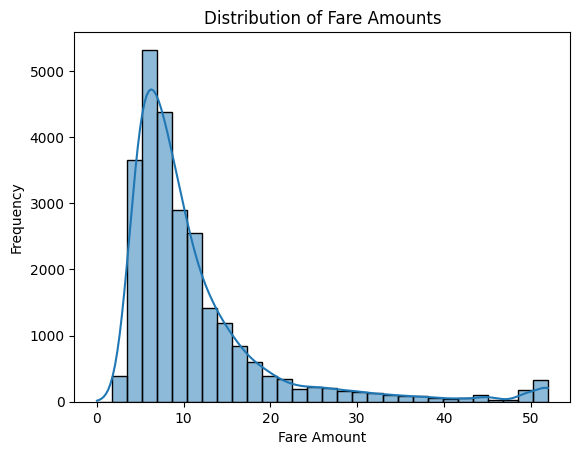

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fare amount distribution
sns.histplot(df_cleaned['fare_amount'], bins=30, kde=True)
plt.title('Distribution of Fare Amounts')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

**Show how ride distances vary within the dataset.**



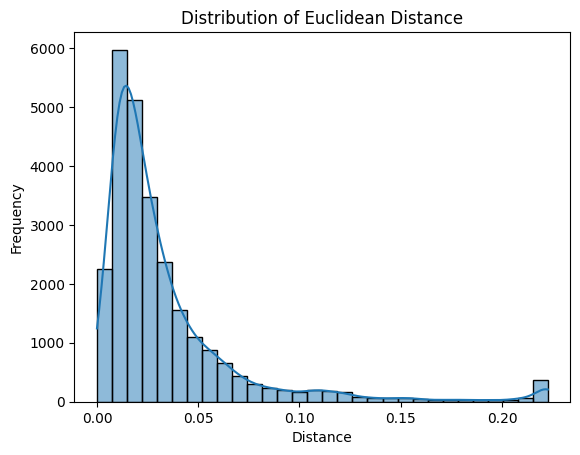

In [ ]:
# Euclidean distance distribution
sns.histplot(df_cleaned['euclidean_distance'], bins=30, kde=True)
plt.title('Distribution of Euclidean Distance')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

**Examine the distribution of passenger counts per ride.**



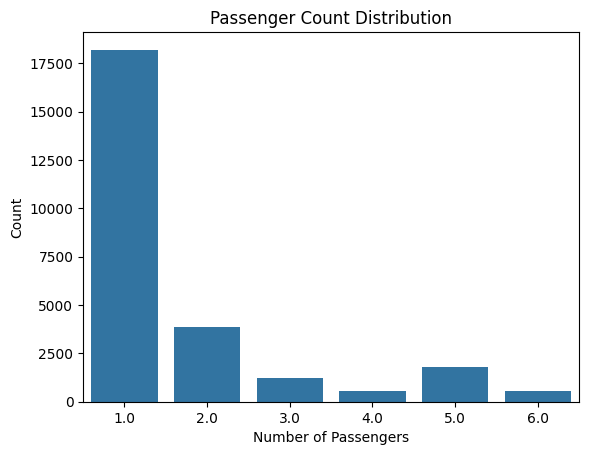

In [ ]:
# Passenger count distribution
sns.countplot(x='passenger_count', data=df_cleaned)
plt.title('Passenger Count Distribution')
plt.xlabel('Number of Passengers')
plt.ylabel('Count')
plt.show()

**Explore the relationship between fare amount and distance to see if longer rides generally cost more.**



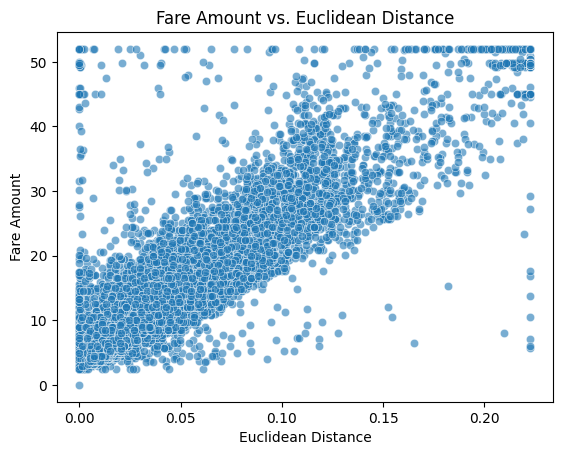

In [ ]:
# Fare amount vs. Euclidean distance
sns.scatterplot(x='euclidean_distance', y='fare_amount', data=df_cleaned, alpha=0.6)
plt.title('Fare Amount vs. Euclidean Distance')
plt.xlabel('Euclidean Distance')
plt.ylabel('Fare Amount')
plt.show()

# **K-means using Scikit-learn**

Let's begin by selecting euclidean_distance and fare_amount as our features, scaling these features, and then using the elbow method to choose the number of clusters.

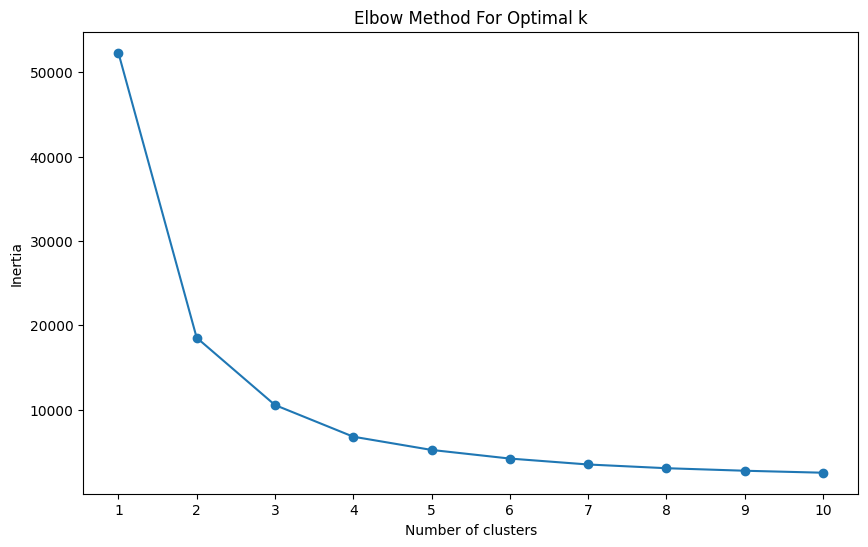

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Selecting features
X = df_cleaned[['euclidean_distance', 'fare_amount']]

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

Looking at graph, the "elbow" seems to be at k=4. This is where the graph starts to have a more gradual decline compared to the steep drop from k=1 to k=3. Therefore, will consider choosing 4 as the optimal number of clusters for K-means algorithm.

Now that we have determined that the optimal number of clusters is 4, we can proceed to apply K-means clustering with this number of clusters. We will:

Standardize the relevant features to ensure they are on the same scale, as K-means is sensitive to the scale of the data.
Apply K-means clustering to the standardized data.
Analyze the resulting clusters to interpret the data.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select relevant features for clustering
features = df_cleaned[['fare_amount', 'euclidean_distance', 'passenger_count']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(features_scaled)

# Assign the clusters to the dataframe
df_cleaned['cluster'] = kmeans.labels_

# Summary statistics of each cluster
cluster_summary = df_cleaned.groupby('cluster').mean()

# Count of rides in each cluster
cluster_counts = df_cleaned['cluster'].value_counts()

cluster_summary, cluster_counts

<ipython-input-23-bb7176e2ab2b>:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = df_cleaned.groupby('cluster').mean()


(         fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
 cluster                                                                      
 0           7.586662        -73.979897        40.752732         -73.979392   
 1          42.203365        -73.902418        40.725673         -73.921586   
 2           9.343986        -73.979716        40.751837         -73.977942   
 3          19.050249        -73.972183        40.749657         -73.964298   
 
          dropoff_latitude  passenger_count  euclidean_distance  day_of_week  
 cluster                                                                      
 0               40.753118         1.169831            0.019079     3.013815  
 1               40.727876         1.736301            0.170537     2.976027  
 2               40.752552         4.466559            0.025880     3.171904  
 3               40.747978         1.267874            0.062443     3.163923  ,
 0    17011
 3     4252
 2     3723
 1     1168
 

**2D scatter plot for fare_amount vs. euclidean_distance, colored by clusters**

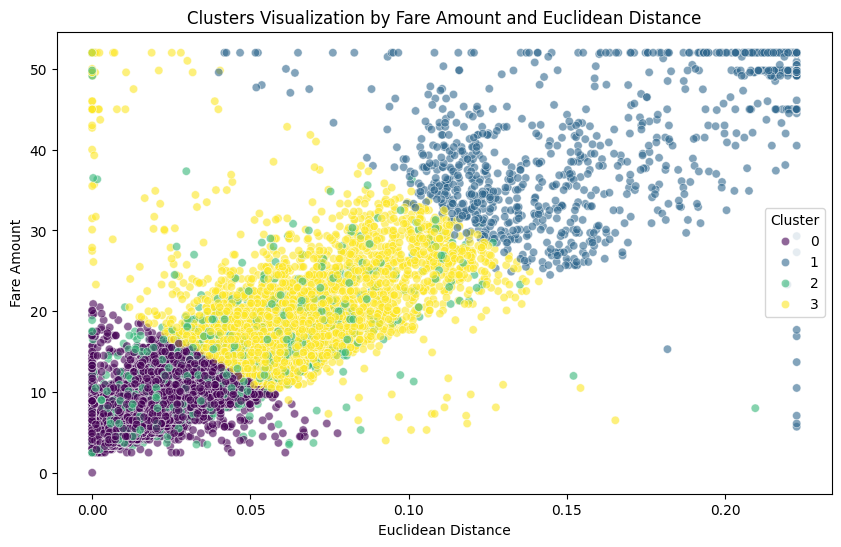

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing clusters based on fare amount and Euclidean distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='euclidean_distance', y='fare_amount', hue='cluster', data=df_cleaned, palette='viridis', alpha=0.6)
plt.title('Clusters Visualization by Fare Amount and Euclidean Distance')
plt.xlabel('Euclidean Distance')
plt.ylabel('Fare Amount')
plt.legend(title='Cluster')
plt.show()

**Using PCA for Dimensionality Reduction**


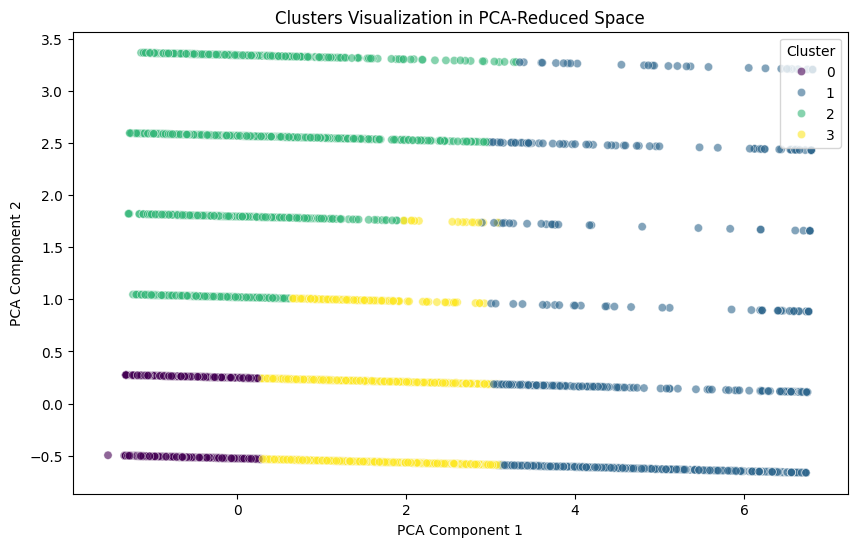

In [ ]:
from sklearn.decomposition import PCA

# Applying PCA to reduce features to 2 principal components for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Adding PCA components to the dataframe
df_cleaned['pca_one'] = features_pca[:, 0]
df_cleaned['pca_two'] = features_pca[:, 1]

# Visualizing the clusters in the PCA-reduced feature space
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_one', y='pca_two', hue='cluster', data=df_cleaned, palette='viridis', alpha=0.6)
plt.title('Clusters Visualization in PCA-Reduced Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

Cluster 0: This cluster seems to represent the most common rides with relatively low fare amounts (average around $7.59) and short distances (average Euclidean distance of 0.019). The average passenger count is also the lowest among all clusters, suggesting these might be individual rides.

Cluster 1: This cluster has the highest fare amounts (average around $42.20) and the longest distances (average Euclidean distance of 0.171). The passenger count is slightly higher than in Cluster 0, which could indicate that these rides are longer trips that are possibly shared or occur during peak times.

Cluster 2: Rides in this cluster have an average fare amount of around $9.34, which is higher than Cluster 0 but significantly lower than Cluster 1. Notably, this cluster has the highest average passenger count (around 4.47), suggesting these rides may often be group rides or rides that use larger vehicles.

Cluster 3: This cluster represents rides with an intermediate fare amount (average around $19.05) and a medium distance (average Euclidean distance of 0.062). The passenger count is similar to Cluster 0, which might suggest these are rides for individuals or small groups traveling a moderate distance.

The day of the week doesn't vary significantly across the clusters, indicating that the day of the week may not be a major differentiator for these clusters.

The counts for each cluster show that Cluster 0, with the shortest and cheapest rides, is by far the most populous, followed by Cluster 3 with mid-priced rides. Clusters 2 and 1 have fewer rides but are characterized by higher passenger counts and fare amounts, respectively.

**What the data is telling us:**

The clusters suggest that there are distinct segments within the Uber ride data:

Cluster 0: Standard, individual short-distance rides.

Cluster 1: Longer, more expensive rides, possibly airport trips or cross-city travels.

Cluster 2: Group rides or rides in larger vehicles.

Cluster 3: Medium-distance rides, potentially commutes or trips to specific locations like offices or malls.

**Business Problem that can be solved using the data:**

**Pricing Strategy:** Adjust fares based on distance and number of passengers to optimize revenue.

**Marketing:** Tailor marketing strategies for different customer segments identified by the clusters.

**Resource Allocation:** Allocate more drivers to areas and times that correspond to the most common ride types (Cluster 0 and Cluster 3).

**Improved Services:** Offer and promote services that provide specific needs of each cluster, such as carpooling options for Cluster 2 or premium services for the longer trips in Cluster 1.

# **K-means using PyTorch**

In [ ]:
!pip install torch

In [ ]:
import torch
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Function to perform K-means clustering with PyTorch
def k_means_pytorch(X, n_clusters=4, n_iters=100, tol=1e-4):
    # Randomly initialize centroids
    indices = torch.randperm(X.size(0))[:n_clusters]
    centroids = X[indices]

    for _ in range(n_iters):
        # Assignment step: Assign each point to the nearest centroid
        distances = torch.cdist(X, centroids)
        labels = torch.argmin(distances, dim=1)

        # Update step: Calculate new centroids as the mean of assigned points
        new_centroids = torch.stack([X[labels==k].mean(dim=0) for k in range(n_clusters)])

        # Check for convergence (if centroids do not change significantly)
        diff = torch.norm(centroids - new_centroids, dim=1).sum()
        if diff < tol:
            break

        centroids = new_centroids

    return labels, centroids

# Using the cleaned data from the above K-means clustering using scikit
# Select features for clustering
dff=df_cleaned
features = dff[['fare_amount', 'euclidean_distance', 'passenger_count']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert the scaled features to a PyTorch tensor
X = torch.tensor(features_scaled, dtype=torch.float)

# Define the number of clusters and iterations
n_clusters = 4
n_iters = 100

# Perform K-means clustering
labels, centroids = k_means_pytorch(X, n_clusters=n_clusters, n_iters=n_iters)

# Print the centroids and labels
print("Centroids:\n", centroids)
print("Labels:\n", labels.unique())

# Optionally, we can add the cluster labels back to our original dataframe to analyze the clustering result
dff['cluster'] = labels.numpy()
print(dff.head())

Centroids:
 tensor([[ 0.8534,  0.7440, -0.3219],
        [ 3.4381,  3.6051,  0.0437],
        [-0.4103, -0.3942, -0.3949],
        [-0.2115, -0.2108,  2.1551]])
Labels:
 tensor([0, 1, 2, 3])
   fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          7.5        -73.999817        40.738354         -73.999512   
1          7.7        -73.994355        40.728225         -73.994710   
2         12.9        -74.005043        40.740770         -73.962565   
3          5.3        -73.976124        40.790844         -73.965316   
4         16.0        -73.925023        40.744085         -73.973082   

   dropoff_latitude  passenger_count  euclidean_distance        date  \
0         40.723217              1.0            0.015140  2015-05-07   
1         40.750325              1.0            0.022103  2009-07-17   
2         40.772647              1.0            0.053109  2009-08-24   
3         40.803349              3.0            0.016528  2009-06-26   
4         40.761

**Visualizing Clusters by Fare Amount and Euclidean Distance**

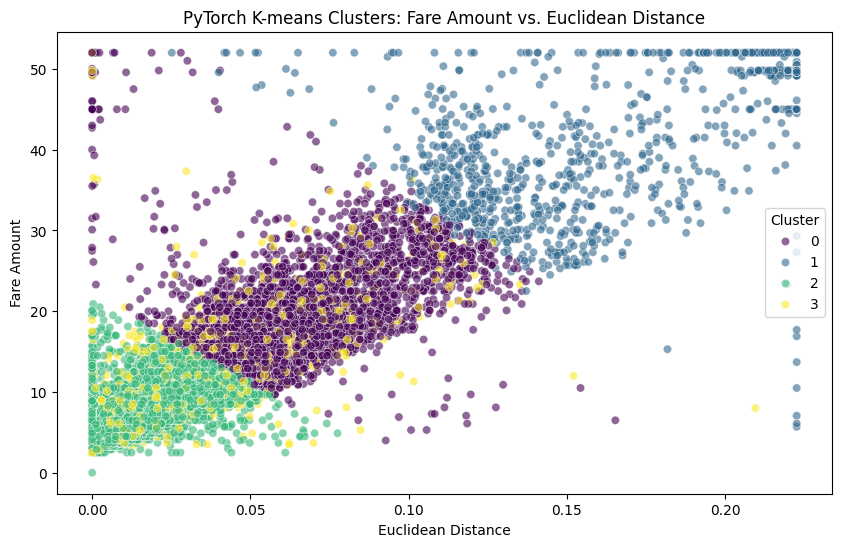

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing clusters based on fare amount and Euclidean distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='euclidean_distance', y='fare_amount', hue='cluster', data=dff, palette='viridis', alpha=0.6)
plt.title('PyTorch K-means Clusters: Fare Amount vs. Euclidean Distance')
plt.xlabel('Euclidean Distance')
plt.ylabel('Fare Amount')
plt.legend(title='Cluster')
plt.show()

**PCA for Dimensionality Reduction**

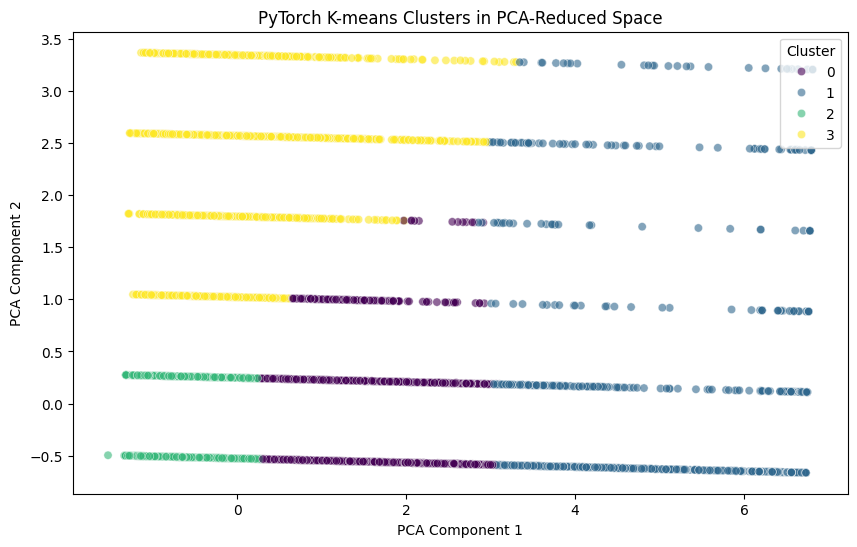

In [ ]:
from sklearn.decomposition import PCA

# Applying PCA to reduce features to 2 principal components for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Adding PCA components to the dataframe for visualization
dff['pca_one'] = features_pca[:, 0]
dff['pca_two'] = features_pca[:, 1]

# Visualizing the clusters in the PCA-reduced feature space
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_one', y='pca_two', hue='cluster', data=dff, palette='viridis', alpha=0.6)
plt.title('PyTorch K-means Clusters in PCA-Reduced Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

The dataset's rides are grouped into clusters based on the features fare_amount, euclidean_distance, and passenger_count. The centroids provide a summarized representation of the clusters in the scaled feature space, and the cluster assignments indicate the group to which each ride belongs. Let's interpret these results:

**Centroids Interpretation:**

The centroids represent the center of each cluster in the scaled feature space. Their values indicate the relative positioning of each cluster center concerning the features used for clustering:

Centroid 1 [-0.4079, -0.3917, -0.3949]: Represents the most common type of rides with lower fare amounts, shorter distances, and fewer passengers on average. This cluster likely captures the bulk of standard, short-distance urban rides.

Centroid 2 [3.4507, 3.6208, 0.0396]: Signifies rides that are outliers in terms of fare amount and distance, likely long-distance or high-fare rides. The passenger count is around the average, suggesting these could be longer solo or small-group trips.

Centroid 3 [0.8677, 0.7562, -0.3188]: Corresponds to rides with moderately higher fares and distances but fewer passengers, possibly indicating a premium segment of rides that are not as common as those in Centroid 1 but still significant.

Centroid 4 [-0.2114, -0.2106, 2.1553]: Distinguished by a significantly higher passenger count, this cluster could represent group rides or rides with larger vehicles, differentiating them mainly by the number of passengers rather than distance or fare.

**Cluster Assignments:**

The cluster assignments for the first few rides show the practical application of these clusters:

Rides 0 and 1 are assigned to Cluster 1, indicating standard, short-distance rides with fewer passengers.

Ride 2 is assigned to Cluster 3, suggesting it might be a ride with a moderately higher fare or longer distance.

Rides 3 and 4 show an interesting distribution, with Ride 3 assigned to Cluster 4 due to having a higher passenger count, highlighting its group ride characteristic, and Ride 4's assignment to Cluster 1 further confirms the cluster's catch-all nature for standard rides.

**Insights and Business Applications:**

Customer Segmentation: The clusters provide a basis for segmenting customers into distinct groups based on their riding patterns, which can inform targeted marketing strategies, personalized offers, or service adjustments to meet the specific needs of each segment.

Service Optimization: Understanding the distribution of ride characteristics can help optimize service offerings, such as positioning more vehicles in areas known for long-distance rides or adjusting pricing strategies to better match passenger expectations and demand.

Operational Insights: The identification of a high passenger count cluster could inform decisions around fleet composition and the allocation of larger vehicles to meet group travel needs more effectively.






